In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, f1_score,accuracy_score ,precision_recall_curve, average_precision_score

In [2]:
path_model = 'Models/YOUR_MODEL_NAME/'

In [3]:
df = pd.read_csv(path_model+'predictions.csv')

In [4]:
# set up filters for datasets
high_quality_filter = df['total_votes_received']>2
ultra_quality_filter = df['total_votes_received']>=8
mode_filter = df['Mode']=='Test'
frac_filter = (df['fraction_of_yes'] >6 /8) | (df['fraction_of_yes'] < 2/8)


In [5]:
# load samples as defined in spikenet paper
AUC_df = df[ultra_quality_filter & mode_filter & frac_filter]
labels = AUC_df.fraction_of_yes.values.round(0).astype(int)
preds = AUC_df.preds
# calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(labels, preds)
roc_auc = auc(fpr, tpr)

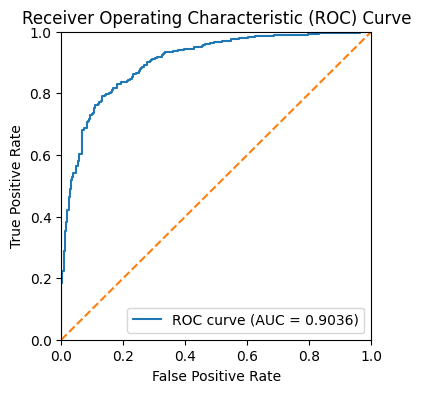

In [6]:
# plot ROC 
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
ax.plot([0, 1], [0, 1], linestyle='--')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend()
fig.savefig(path_model+'ROC.png', dpi=300, bbox_inches='tight')



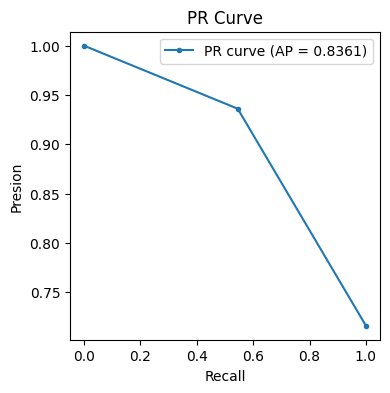

In [7]:
# plot PR 
pred = AUC_df.preds.values.round(0).astype(int)
precision, recall, _ = precision_recall_curve(labels,pred)
average_precision = average_precision_score(labels,pred)
fig, ax = plt.subplots(figsize=(4,4))
plt.plot(recall, precision, marker='.', label='PR curve (AP = %0.4f)' % average_precision)
ax.set_xlabel('Recall')
ax.set_ylabel('Presion')
ax.set_title('PR Curve')
ax.legend()
fig.savefig(path_model+'PR.png', dpi=300, bbox_inches='tight')

